<a href="https://colab.research.google.com/github/Gonzales-Franz-Reinaldo/SIS421-IA2/blob/main/Laboratorios/LAB-04_RNN/LAB_04_RNN_Calidad_Agua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB-04 DE SIS421

##Nombre: Gonzales Suyo Franz Reinaldo

##C.U. 111-500

##Link GitHub: https://github.com/Gonzales-Franz-Reinaldo/SIS421-IA2/tree/main/Laboratorios/LAB-04_RNN

#**REDES NEURONALES RECURRENTES**

###CONTEXTO DEL LABORATORIO

Aplicar un Red Neuronal Recurrente, para lograr predecir la calidad del agua, a lo largo de todo el año 2024 y 2025, para lo cual debe investigar cuales son los indicadores que se deben considerar para establecer el valor del indice de calidad de agua, considerando los valores que se establecen como limites, generar un dataset sintetico para encarar este problema. Usted debe decidir que modelo de rnn es el mas preciso y justificar detalladamente el por que de su eleccion. Se le recomienda utilizar los elementos fisico-quimicos que se miden en la petard, para lo cual se adjuntan las imagenes compartidas.

No se olvide considerar un conjunto de datos suficiente, que represente varios años, varias temporadas y otros aspectos que usted considere necesario.

Las imagenes solo tienen caracter informativo y orientativo para la construccion del dataset sintetico y como deben ser las predicciones o inferencias solicitadas.

###Definimos los indicadores importantes que se tomaron en cuenta:

- pH
- Cloro libre (mg/L)
- Cromo +6 (mg/L)
- Demanda Biológica de Oxígeno (DBO5) (mg/L)
- Demanda Química de Oxígeno (DQO) (mg/L)
- Fósforo (mg/L)
- Sólidos suspendidos totales (mg/L)
- Sulfuros (mg/L)
- Fenoles (mg/L)
- Coliformes termoresistentes (NMP/100ml)


Generación de datos sintéticos por meses: Simularemos valores mensuales para estos indicadores desde años anteriores (201..-2023) y luego entrenaremos un modelo de RNN para predecir los valores para 2024 y 2025. Como los valores fluctúan por estaciones, introduciremos patrones estacionales en los datos.

Variables temporales: Las predicciones se realizarán por meses, por lo que nuestro dataset debe tener 12 entradas por año.


##LIMITES

###Indicadores de calidad del agua generados:

- pH: Nivel de acidez o alcalinidad del agua (rango entre 6.0 y 9.0).
- Cloro: Cantidad de cloro libre en el agua (rango entre 0.01 y 0.2 mg/L).
- Cromo +6: Cantidad de cromo hexavalente en el agua (rango entre 0.01 y 0.1 mg/L).
- DBO5: Demanda Biológica de Oxígeno (rango entre 10 y 80 mg/L).
- DQO: Demanda Química de Oxígeno (rango entre 30 y 250 mg/L).
- Fósforo: Concentración de fósforo (rango entre 0.1 y 1.0 mg/L).
- Sólidos suspendidos totales: Partículas suspendidas en el agua (rango entre 50 y 150 mg/L).
- Sulfuros: Concentración de sulfuros en el agua (rango entre 0.01 y 1.0 mg/L).
- Fenoles: Concentración de fenoles (rango entre 0.01 y 2.0 mg/L).
- Coliformes termoresistentes: Concentración de coliformes en NMP/100ml (rango entre 100 y 1500 NMP/100ml).

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

##1. Preparación del Dataset Sintético para el problema.

In [2]:
import numpy as np


def normalizar_datos(data, min_val, max_val):
    # Aplicar normalización Min-Max
    return (data - min_val) / (max_val - min_val)


def generar_datasetSintetico_water_quality_data(batch_size, n_steps):
    n_features = 10  # 10 indicadores clave
    time = np.linspace(0, 1, n_steps)
    data_calida_agua = np.zeros((batch_size, n_steps, n_features), dtype=np.float32)

    # Definir los valores mínimos y máximos de cada indicador
    min_vals = [6.0, 0.01, 0.01, 10, 30, 0.1, 50, 0.01, 0.01, 100]
    max_vals = [9.0, 0.2, 0.1, 80, 250, 1.0, 150, 1.0, 2.0, 1500]

    for i in range(batch_size):
        # Generar valores aleatorios para las características de calidad del agua
        pH = np.random.uniform(6.0, 9.0, size=n_steps)  # pH
        cloro = np.random.uniform(0.01, 0.3, size=n_steps)  # Cloro libre (mg/L)
        cromo = np.random.uniform(0.01, 0.4, size=n_steps)  # Cromo +6 (mg/L)
        DBO5 = np.random.uniform(10, 80, size=n_steps)  # Demanda Biológica de Oxígeno (mg/L)
        DQO = np.random.uniform(30, 250, size=n_steps)  # Demanda Química de Oxígeno (mg/L)
        fosforo = np.random.uniform(0.1, 1.3, size=n_steps)  # Fósforo (mg/L)
        solidos_susp = np.random.uniform(50, 150, size=n_steps)  # Sólidos suspendidos totales (mg/L)
        sulfuros = np.random.uniform(0.01, 1.6, size=n_steps)  # Sulfuros (mg/L)
        fenoles = np.random.uniform(0.01, 2.2, size=n_steps)  # Fenoles (mg/L)
        coliformes = np.random.uniform(100, 1500, size=n_steps)  # Coliformes termoresistentes (NMP/100ml)

        # Introducir variabilidad estacional (por ejemplo, valores más altos en verano)
        seasonal_factor = 0.5 * np.sin(2 * np.pi * time * 2)  # Variabilidad Factor estacional

        # Aplicar la variabilidad estacional a los indicadores
        data_calida_agua[i, :, 0] = pH * (1 + seasonal_factor)
        data_calida_agua[i, :, 1] = cloro * (1 + seasonal_factor)
        data_calida_agua[i, :, 2] = cromo * (1 + seasonal_factor)
        data_calida_agua[i, :, 3] = DBO5 * (1 + seasonal_factor)
        data_calida_agua[i, :, 4] = DQO * (1 + seasonal_factor)
        data_calida_agua[i, :, 5] = fosforo * (1 + seasonal_factor)
        data_calida_agua[i, :, 6] = solidos_susp * (1 + seasonal_factor)
        data_calida_agua[i, :, 7] = sulfuros * (1 + seasonal_factor)
        data_calida_agua[i, :, 8] = fenoles * (1 + seasonal_factor)
        data_calida_agua[i, :, 9] = coliformes * (1 + seasonal_factor)

        # Normalizar los indicadores y aplicar la variabilidad estacional
        # data_calida_agua[i, :, 0] = normalizar_datos(pH, min_vals[0], max_vals[0]) * (1 + seasonal_factor)
        # data_calida_agua[i, :, 1] = normalizar_datos(cloro, min_vals[1], max_vals[1]) * (1 + seasonal_factor)
        # data_calida_agua[i, :, 2] = normalizar_datos(cromo, min_vals[2], max_vals[2]) * (1 + seasonal_factor)
        # data_calida_agua[i, :, 3] = normalizar_datos(DBO5, min_vals[3], max_vals[3]) * (1 + seasonal_factor)
        # data_calida_agua[i, :, 4] = normalizar_datos(DQO, min_vals[4], max_vals[4]) * (1 + seasonal_factor)
        # data_calida_agua[i, :, 5] = normalizar_datos(fosforo, min_vals[5], max_vals[5]) * (1 + seasonal_factor)
        # data_calida_agua[i, :, 6] = normalizar_datos(solidos_susp, min_vals[6], max_vals[6]) * (1 + seasonal_factor)
        # data_calida_agua[i, :, 7] = normalizar_datos(sulfuros, min_vals[7], max_vals[7]) * (1 + seasonal_factor)
        # data_calida_agua[i, :, 8] = normalizar_datos(fenoles, min_vals[8], max_vals[8]) * (1 + seasonal_factor)
        # data_calida_agua[i, :, 9] = normalizar_datos(coliformes, min_vals[9], max_vals[9]) * (1 + seasonal_factor)


    return data_calida_agua


Aquí se introduce una variabilidad estacional mediante una función sinusoidal que simula los cambios que ocurren en los indicadores a lo largo del año. Esta variabilidad es más alta en ciertas épocas, como en verano, y más baja en otras, como en invierno. Los valores de los indicadores se multiplican por este factor estacional para que reflejen fluctuaciones anuales.

In [3]:
# Generar el dataset sintético con 70,000 ejemplos y 12 pasos por ejemplo (12 meses por año)
n_steps = 12 # El número de pasos temporales que representan el número de meses
series = generar_datasetSintetico_water_quality_data(70000, n_steps + 1)

# Dividir el dataset en entrenamiento, validación y prueba
X_train, y_train = series[:40000, :n_steps], series[:40000, -1, :]
X_valid, y_valid = series[40000:60000, :n_steps], series[40000:60000, -1, :]
X_test, y_test = series[60000:, :n_steps], series[60000:, -1, :]

# Mostrar la forma del conjunto de entrenamiento para verificar
print(X_train.shape, y_train.shape)


(40000, 12, 10) (40000, 10)


In [4]:
# Mostrar la forma del conjunto de validacion y prueba para verificar
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(20000, 12, 10) (20000, 10)
(10000, 12, 10) (10000, 10)


In [5]:
print(series)

[[[6.65870571e+00 1.24739334e-01 9.67263877e-02 ... 6.82260692e-01
   7.75454119e-02 1.09728430e+03]
  [1.13700361e+01 3.99644226e-01 1.47345677e-01 ... 2.13519979e+00
   9.42826688e-01 9.84710205e+02]
  [8.93244457e+00 4.00170088e-02 2.32121527e-01 ... 1.96890935e-01
   1.10485089e+00 2.10648218e+03]
  ...
  [3.74962306e+00 2.04266179e-02 1.77784204e-01 ... 2.44618833e-01
   4.23222780e-01 9.46716843e+01]
  [3.68249822e+00 1.41888812e-01 2.02629671e-01 ... 3.77484679e-01
   1.23421240e+00 6.77282349e+02]
  [8.40069962e+00 1.52687848e-01 3.68137538e-01 ... 1.12619147e-01
   1.10346770e+00 1.17924976e+03]]

 [[8.51898479e+00 7.00082630e-02 4.27091308e-02 ... 7.97249258e-01
   1.18621612e+00 9.73613098e+02]
  [1.01757822e+01 3.48733157e-01 2.76599735e-01 ... 6.26303673e-01
   2.76994562e+00 9.89176758e+02]
  [1.13869047e+01 2.62530804e-01 2.81516761e-01 ... 1.43684149e+00
   2.11166811e+00 2.38601669e+02]
  ...
  [4.72194290e+00 7.30776461e-03 4.23733182e-02 ... 3.94235671e-01
   1.13926

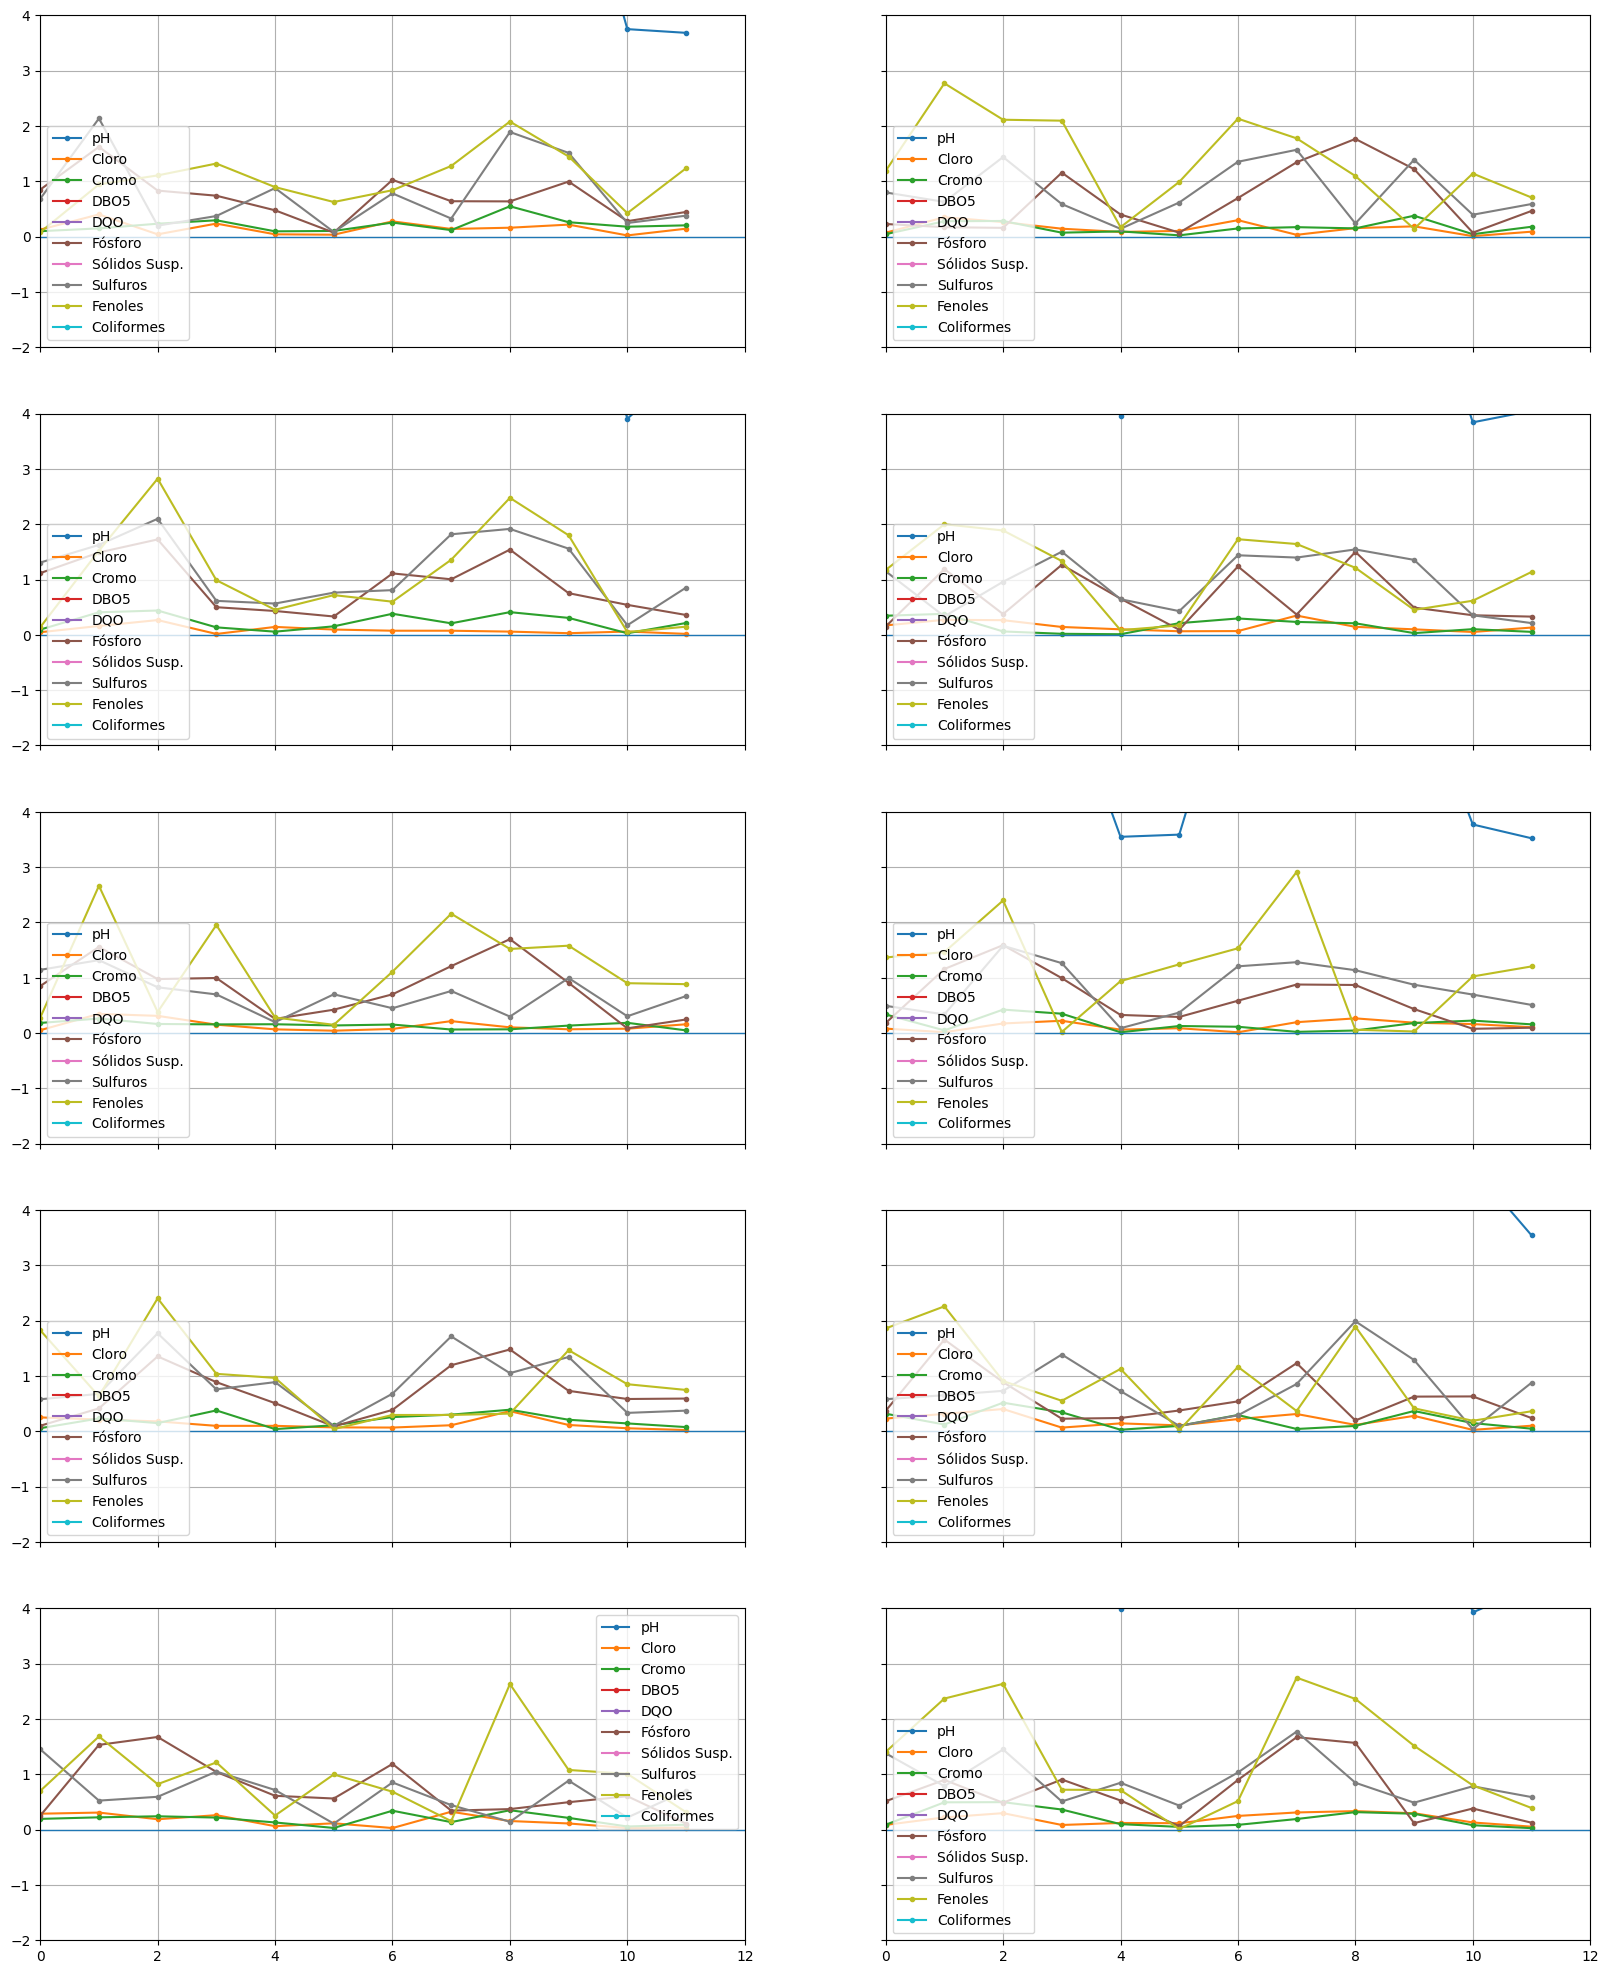

In [6]:
import matplotlib.pyplot as plt

# Adaptación de la función de graficación para múltiples características
def plot_water_quality_series(series, feature_names=None, n_rows=5, n_cols=2):
    r, c = n_rows, n_cols
    fig, axes = plt.subplots(nrows=r, ncols=c, sharey=True, sharex=True, figsize=(20, 25))

    num_features = series.shape[-1]  # Número de características (indicadores)
    num_examples = min(r * c, series.shape[0])  # Limitar el número de ejemplos a graficar

    # Seleccionar indicadores específicos para graficar
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(num_features)]

    for row in range(r):
        for col in range(c):
            plt.sca(axes[row][col])
            ix = col + row * c
            if ix >= num_examples:
                break
            for feature in range(num_features):
                plt.plot(series[ix, :, feature], ".-", label=f"{feature_names[feature]}")

            plt.grid(True)
            plt.hlines(0, 0, len(series[ix, :]), linewidth=1)
            plt.axis([0, len(series[ix, :]), -2, 4])
            plt.legend(loc="best")

    plt.show()

# Indicadores o nombres de características (puedes cambiar los nombres según corresponda)
feature_names = ['pH', 'Cloro', 'Cromo', 'DBO5', 'DQO', 'Fósforo', 'Sólidos Susp.', 'Sulfuros', 'Fenoles', 'Coliformes']

# Graficar series de entrenamiento (primeros 9 ejemplos)
plot_water_quality_series(X_train, feature_names=feature_names)


##Normalización de los datos

In [7]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos usando StandardScaler
scaler = StandardScaler()

# Redimensionar el dataset para aplicar escalado
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])  # (40000 * 12, 10)
X_valid_reshaped = X_valid.reshape(-1, X_valid.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

# Aplicar estandarización
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_valid_scaled = scaler.transform(X_valid_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Volver a la forma original (samples, time_steps, features)
X_train_ = X_train_scaled.reshape(X_train.shape)
X_valid_ = X_valid_scaled.reshape(X_valid.shape)
X_test_ = X_test_scaled.reshape(X_test.shape)


In [8]:
# Normalizar las etiquetas (targets)
y_train_ = scaler.fit_transform(y_train)
y_valid_ = scaler.transform(y_valid)
y_test_ = scaler.transform(y_test)

# Ahora, las etiquetas y_train, y_valid, y_test están normalizadas entre 0 y 1
print(y_train_.shape, y_valid_.shape, y_test_.shape)


(40000, 10) (20000, 10) (10000, 10)


In [9]:
print(X_train_)
print(y_train_)

[[[-3.0017933e-01 -2.9139051e-01 -7.7468997e-01 ... -2.1709260e-01
   -1.3216105e+00  5.7933742e-01]
  [ 1.3798016e+00  2.3403714e+00 -4.1191745e-01 ...  2.3604751e+00
   -2.0707884e-01  3.6000195e-01]
  [ 5.1059759e-01 -1.1024673e+00  1.9564435e-01 ... -1.0781565e+00
    1.6175798e-03  2.5456233e+00]
  ...
  [ 1.8154573e-02  5.7887471e-01  3.8770068e-01 ...  1.2546653e+00
    4.4226500e-01 -6.1370462e-01]
  [-1.3375092e+00 -1.2900131e+00 -1.9377413e-01 ... -9.9348545e-01
   -8.7635833e-01 -1.3741181e+00]
  [-1.3614447e+00 -1.2721248e-01 -1.5714493e-02 ... -7.5777656e-01
    1.6824259e-01 -2.3897977e-01]]

 [[ 3.6316484e-01 -8.1535041e-01 -1.1618146e+00 ... -1.3098632e-02
    1.0642064e-01  3.3838075e-01]
  [ 9.5395088e-01  1.8529816e+00  5.1440567e-01 ... -3.1636241e-01
    2.1463547e+00  3.6870444e-01]
  [ 1.3858167e+00  1.0277359e+00  5.4964447e-01 ...  1.1215616e+00
    1.2984557e+00 -1.0936899e+00]
  ...
  [-2.9593226e-01  2.7935308e-01  1.2309120e+00 ...  1.0358135e+00
   -1.2413

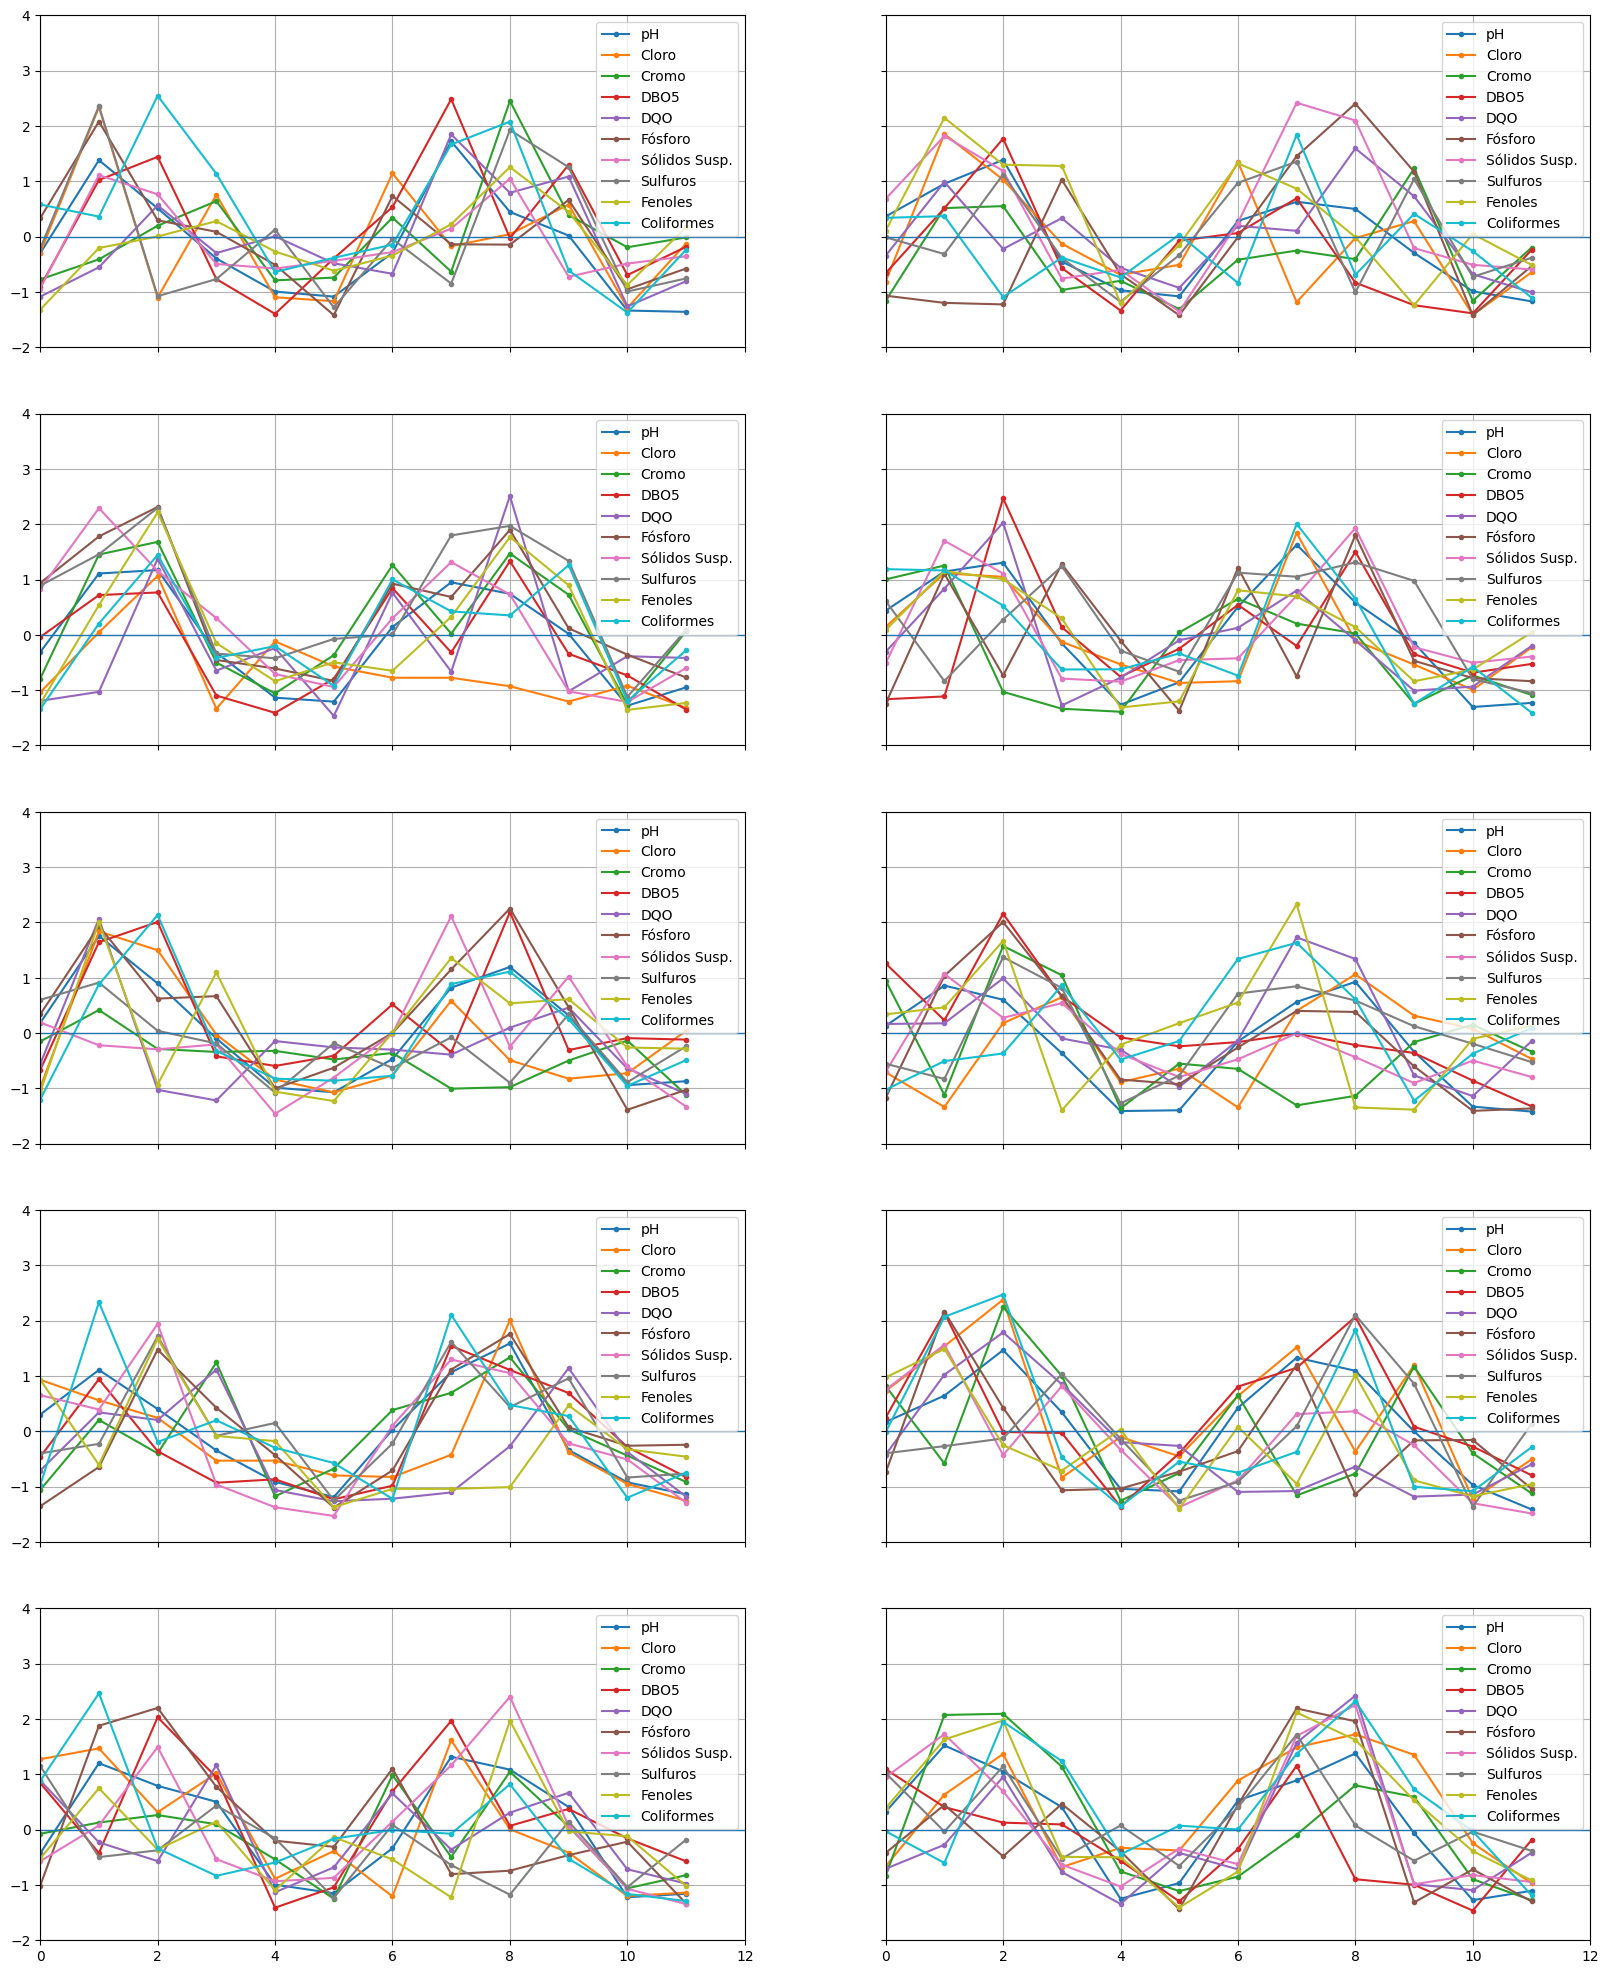

In [10]:
# Graficar series de entrenamiento (primeros 9 ejemplos)
plot_water_quality_series(X_train_, feature_names=feature_names)

###Grafica de muestreo de los datos

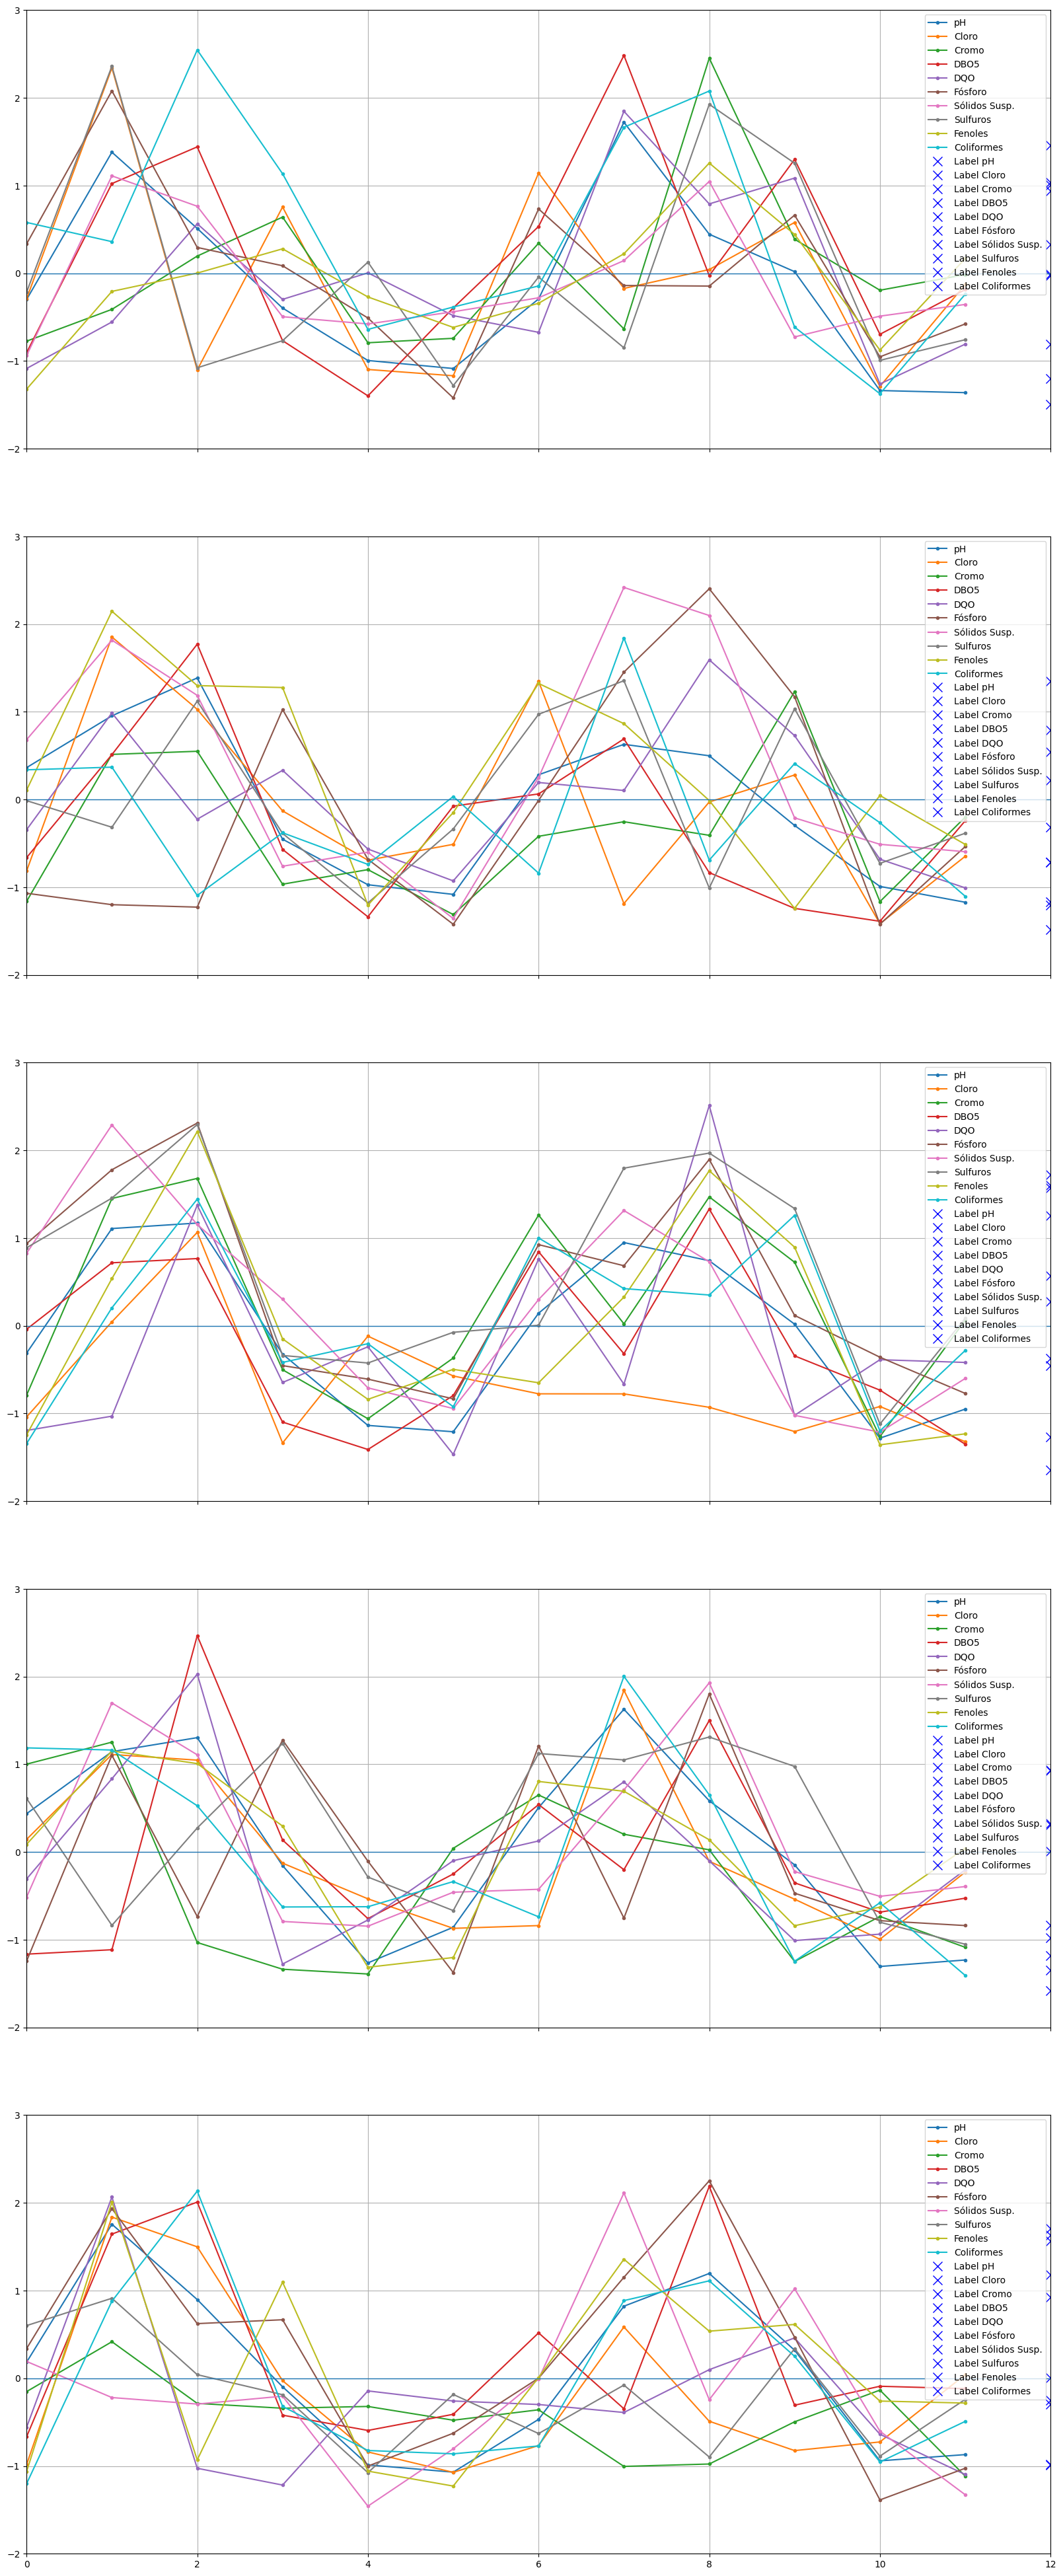

In [11]:
import matplotlib.pyplot as plt

# Adaptación de la función de graficación con etiquetas reales (marcadas con "X")
def grafica_visualizacio_calidadAgua(series, labels=None, y_pred=None, feature_names=None, n_rows=5, n_cols=1):
    r, c = n_rows, n_cols
    fig, axes = plt.subplots(nrows=r, ncols=c, sharey=True, sharex=True, figsize=(20, 50))  # Ajustamos el tamaño de la figura

    num_features = series.shape[-1]  # Número de características (indicadores)
    num_examples = min(r * c, series.shape[0])  # Limitar el número de ejemplos a graficar

    # Seleccionar indicadores específicos para graficar
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(num_features)]

    for row in range(r):
        plt.sca(axes[row])  # Usar directamente el eje para una sola columna
        ix = row
        if ix >= num_examples:
            break

        # Graficar cada característica de calidad del agua
        for feature in range(num_features):
            plt.plot(series[ix, :, feature], ".-", label=f"{feature_names[feature]}")

        # Graficar las etiquetas reales (último valor de cada característica)
        if labels is not None:
            for feature in range(num_features):
                plt.plot(len(series[ix, :, feature]), labels[ix, feature], "bx", markersize=10, label=f"Label {feature_names[feature]}")

        # Opcional: Graficar predicciones
        if y_pred is not None:
            for feature in range(num_features):
                plt.plot(len(series[ix, :, feature]), y_pred[ix, feature], "ro", label=f"Pred {feature_names[feature]}")

        plt.grid(True)
        plt.hlines(0, 0, len(series[ix, :]), linewidth=1)
        plt.axis([0, len(series[ix, :]), -2, 3])
        plt.legend(loc="best")

    plt.show()

# Indicadores o nombres de características (puedes cambiar los nombres según corresponda)
feature_names = ['pH', 'Cloro', 'Cromo', 'DBO5', 'DQO', 'Fósforo', 'Sólidos Susp.', 'Sulfuros', 'Fenoles', 'Coliformes']

# Graficar series de entrenamiento (primeros 5 ejemplos) con una gráfica por fila
grafica_visualizacio_calidadAgua(X_train_, y_train_, feature_names=feature_names)


###PROCESAMIENTO DEL DATASET EN BATCHES APLICANDO DATALOADER

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
  def __init__(self, X, y=None, train=True):
    self.X = X
    self.y = y
    self.train = train

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    if self.train:
      return torch.from_numpy(self.X[ix]), torch.from_numpy(self.y[ix])
    return torch.from_numpy(self.X[ix])


dataset = {
    'train': TimeSeriesDataset(X_train_, y_train_),
    'eval': TimeSeriesDataset(X_valid_, y_valid_),
    'test': TimeSeriesDataset(X_test_, y_test_, train=False)
}

dataloader = {
    'train': DataLoader(dataset['train'], shuffle=True, batch_size=64, drop_last=False),
    'eval': DataLoader(dataset['eval'], shuffle=False, batch_size=64, drop_last=False),
    'test': DataLoader(dataset['test'], shuffle=False, batch_size=64, drop_last=False)
}

##2.Construción del Modelo RNN

In [13]:
import torch
import torch.nn as nn

class DeepRNN(nn.Module):
    def __init__(self, input_size=10, hidden_size=100, num_layers=3, n_out=10, dropout=0.5):
        super(DeepRNN, self).__init__()
        # Capa RNN con múltiples características de entrada
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        # Capa Dropout
        self.dropout = nn.Dropout(dropout)
        # Capa fully connected para predecir los 10 indicadores
        self.fc = nn.Linear(hidden_size, n_out)

    def forward(self, x):
        # Paso a través de la RNN
        x, h = self.rnn(x)  # x tiene tamaño [batch_size, time_steps, hidden_size]

        # Usamos solo la salida del último paso temporal
        x_reshaped = x[:, -1, :]  # Obtener el último paso temporal

        # Aplicar Dropout
        x_reshaped = self.dropout(x_reshaped)

        # Paso por la capa fully connected
        y = self.fc(x_reshaped)
        return y


##3. Entrenamiento del modelo

In [14]:
from tqdm import tqdm
device = "cuda" if torch.cuda.is_available() else "cpu"

# Entrenamiento del modelo (fit function)
def fit(model, dataloader, epochs=10, weight_decay=1e-5):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=weight_decay)
    criterion = torch.nn.MSELoss()

    # tqdm para visualizar el progreso
    bar = tqdm(range(1, epochs+1))

    for epoch in bar:
        model.train()
        train_loss = []
        train_loss_last_step = []

        for batch in dataloader['train']:
            X, y = batch
            X, y = X.to(device), y.to(device)

            # Limpiar gradientes
            optimizer.zero_grad()

            # Hacer predicciones
            y_hat = model(X)

            # Calcular pérdida
            loss = criterion(y_hat, y)
            loss.backward()

            # Actualizar pesos
            optimizer.step()

            train_loss.append(loss.item())
            # Pérdida en el último paso temporal (para el último mes)
            train_loss_last_step.append((y[:, -1] - y_hat[:, -1]).pow(2).mean().item())

        # Evaluar en el conjunto de validación
        model.eval()
        eval_loss = []
        eval_loss_last_step = []
        with torch.no_grad():
            for batch in dataloader['eval']:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)

                # Calcular pérdida en validación
                loss = criterion(y_hat, y)
                eval_loss.append(loss.item())
                eval_loss_last_step.append((y[:, -1] - y_hat[:, -1]).pow(2).mean().item())

        bar.set_description(f"Epoch {epoch}, loss {np.mean(train_loss):.5f}, val_loss {np.mean(eval_loss):.5f}, loss_last_step {np.mean(train_loss_last_step):.5f}, val_loss_last_step {np.mean(eval_loss_last_step):.5f}")


In [15]:
# Instanciar el modelo con Dropout (ejemplo con 50% de Dropout)
rnn = DeepRNN()

# Entrenar el modelo con regularización (dropout y weight_decay)
fit(rnn, dataloader, epochs=100, weight_decay=1e-5)


Epoch 100, loss 0.99835, val_loss 0.99958, loss_last_step 0.99766, val_loss_last_step 1.00673: 100%|██████████| 100/100 [15:30<00:00,  9.31s/it]


##4. Haciendo las Predicciones con algunos datos de prueba

In [16]:
def predict(model, dataloader):
    model.eval()  # Cambiar a modo de evaluación
    preds = []

    with torch.no_grad():
        for batch in dataloader:
            X = batch[0]  # Si el dataloader devuelve un par (X, y), tomamos X
            X = X.to(device)

            # Asegurarnos de que las dimensiones de X sean correctas
            if len(X.shape) == 2:  # Si faltan dimensiones
                X = X.unsqueeze(1)  # Añadimos la dimensión de "time steps"

            # Hacer predicción
            pred = model(X)
            preds.append(pred.cpu().numpy())  # Pasar las predicciones a CPU y convertir a NumPy

    return np.concatenate(preds, axis=0)  # Concatenar todas las predicciones


In [17]:
# Hacer predicciones en el conjunto de prueba
y_pred = predict(rnn, dataloader['test'])
print(y_pred.shape)
print(y_pred)

(1884, 10)
[[-0.01803434 -0.01662504  0.02741452 ... -0.00228342 -0.01261984
  -0.01719798]
 [-0.02446233 -0.01206448  0.00397636 ... -0.01773726  0.00952953
   0.03688674]
 [ 0.00068857  0.01094995  0.02070935 ... -0.0069447  -0.00177391
   0.06777658]
 ...
 [-0.01445264  0.00354931  0.0282953  ...  0.02065944 -0.02597831
  -0.02354707]
 [-0.00990743  0.00211939 -0.00112769 ... -0.03708542  0.00988791
  -0.01547073]
 [-0.01408915  0.0115918   0.00096449 ... -0.03945543  0.01038354
  -0.01980088]]


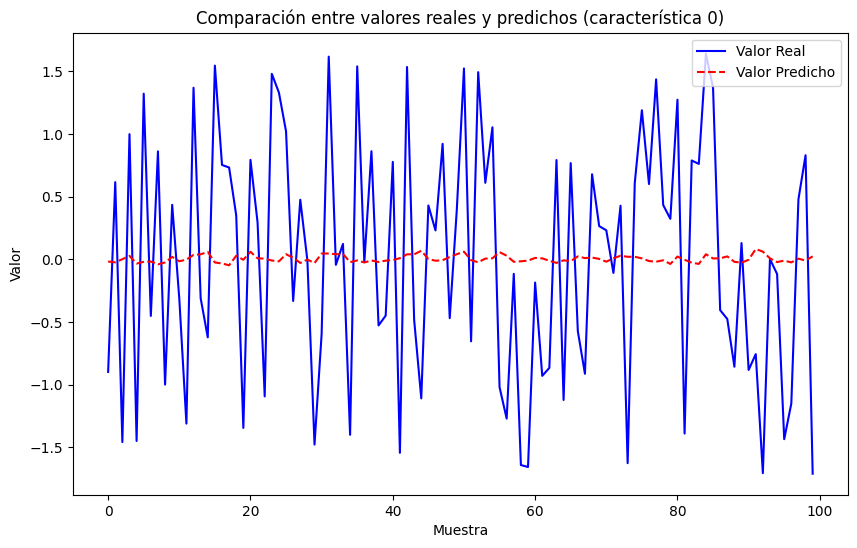

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que y_test_ es el valor real y y_pred es el valor predicho
# Vamos a graficar solo una característica (ej: la primera)

def grafica_visualizar_prediccion(y_test_, y_pred, num_muestras=100, feature_index=0):
    """
    Función para visualizar las predicciones en comparación con los valores reales.
    Grafica los primeros 'num_muestras' ejemplos de la característica 'feature_index'.
    """

    # Seleccionar solo los primeros 'num_muestras' para graficar
    y_test_ = y_test_[:num_muestras, feature_index]
    y_pred = y_pred[:num_muestras, feature_index]

    # Crear la figura
    plt.figure(figsize=(10, 6))

    # Graficar los valores reales
    plt.plot(y_test_, label="Valor Real", color='blue')

    # Graficar los valores predichos
    plt.plot(y_pred, label="Valor Predicho", color='red', linestyle='dashed')

    # Añadir etiquetas y título
    plt.xlabel("Muestra")
    plt.ylabel("Valor")
    plt.title(f"Comparación entre valores reales y predichos (característica {feature_index})")

    # Mostrar la leyenda
    plt.legend()

    # Mostrar la gráfica
    plt.show()

# Ejemplo de uso
grafica_visualizar_prediccion(y_test_, y_pred, num_muestras=100, feature_index=0)


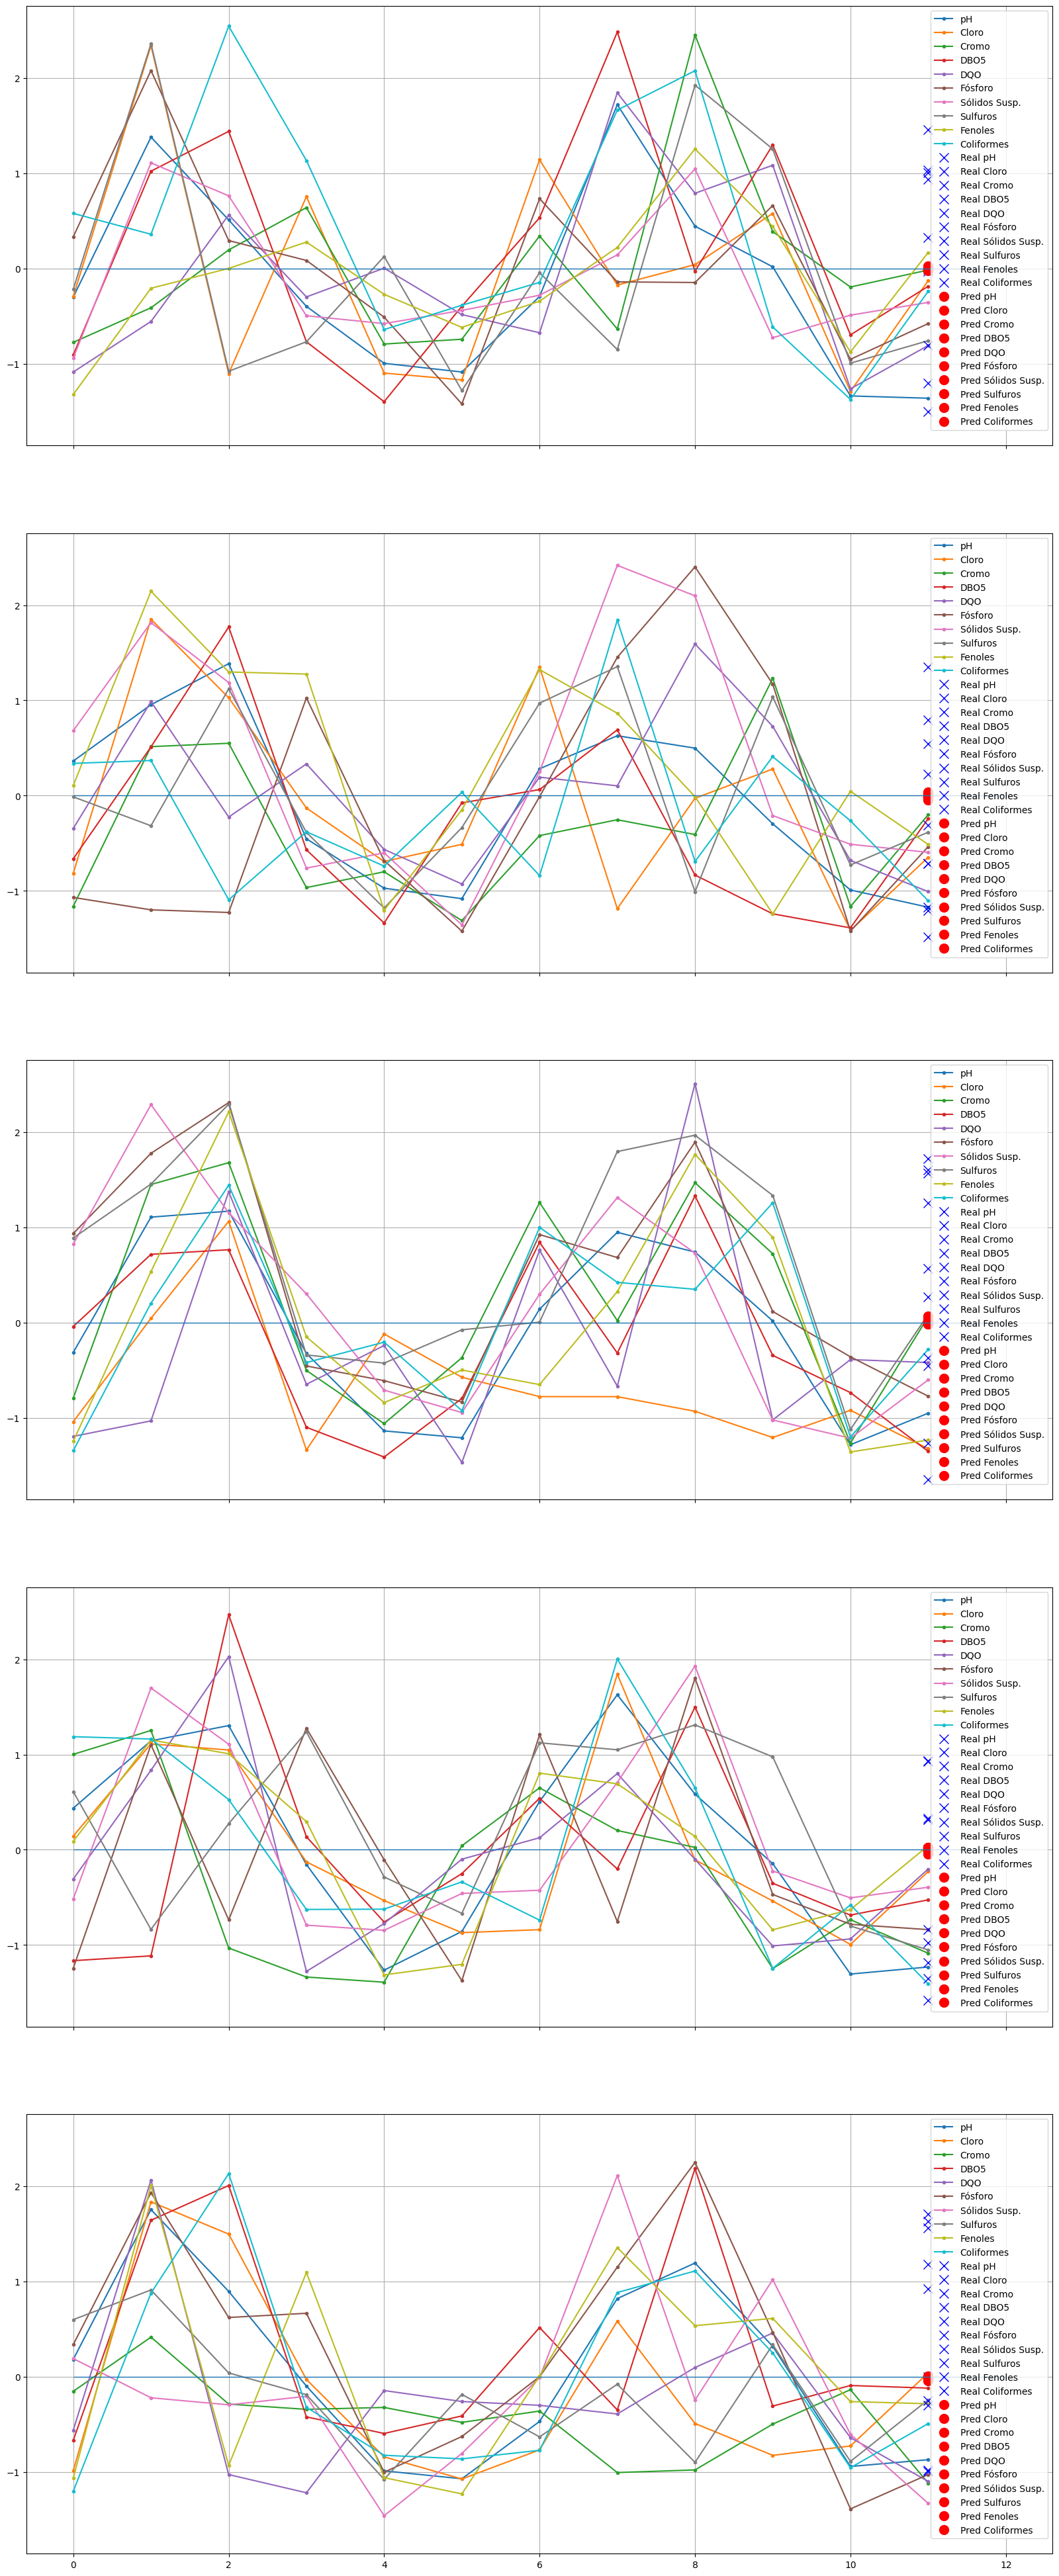

In [19]:
import matplotlib.pyplot as plt

def grafica_visualizacion_calidadAgua(series, labels=None, y_pred=None, feature_names=None, n_rows=5, n_cols=1):
    """
    Visualiza las series de tiempo para las características de calidad del agua junto con las etiquetas reales y predicciones.

    series: Los datos de entrada (por ejemplo, X_train_ o X_test_).
    labels: Las etiquetas reales correspondientes (por ejemplo, y_train_ o y_test_).
    y_pred: Las predicciones hechas por el modelo.
    feature_names: Los nombres de las características.
    n_rows: Número de filas en la gráfica.
    n_cols: Número de columnas en la gráfica (normalmente 1).
    """

    # Configuramos el tamaño de la gráfica
    r, c = n_rows, n_cols
    fig, axes = plt.subplots(nrows=r, ncols=c, sharey=True, sharex=True, figsize=(20, 50))

    num_features = series.shape[-1]  # Número de características
    num_examples = min(r * c, series.shape[0])  # Limitar el número de ejemplos a graficar

    # Si no se pasan los nombres de las características, generar nombres genéricos
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(num_features)]

    for row in range(r):
        # Usamos directamente el eje para una sola columna
        plt.sca(axes[row])
        ix = row
        if ix >= num_examples:
            break

        # Graficar los datos de entrada para cada característica
        for feature in range(num_features):
            plt.plot(series[ix, :, feature], ".-", label=f"{feature_names[feature]}")

        # Graficar las etiquetas reales (último valor de cada serie)
        if labels is not None:
            for feature in range(num_features):
                plt.plot(len(series[ix, :, feature])-1, labels[ix, feature], "bx", markersize=10, label=f"Real {feature_names[feature]}")

        # Graficar las predicciones (último valor predicho para cada serie)
        if y_pred is not None:
            for feature in range(num_features):
                plt.plot(len(series[ix, :, feature])-1, y_pred[ix, feature], "ro", markersize=10, label=f"Pred {feature_names[feature]}")

        # Configuración del gráfico
        plt.grid(True)
        plt.hlines(0, 0, len(series[ix, :, 0]), linewidth=1)
        plt.legend(loc="best")

    plt.show()

# Nombres de las características (indicadores de calidad del agua)
feature_names = ['pH', 'Cloro', 'Cromo', 'DBO5', 'DQO', 'Fósforo', 'Sólidos Susp.', 'Sulfuros', 'Fenoles', 'Coliformes']

# Graficar los primeros 5 ejemplos del conjunto de entrenamiento con sus etiquetas reales y predicciones
grafica_visualizacion_calidadAgua(X_train_, y_train_, y_pred, feature_names=feature_names, n_rows=5, n_cols=1)


In [20]:
y_pred.shape

(1884, 10)

In [21]:
from sklearn.metrics import mean_squared_error

# Calcular el MSE para cada característica en todas las predicciones
mse = mean_squared_error(y_test_[:1884], y_pred)

# Mostrar el resultado
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 1.0056580305099487


##*Prediciendo la calidad del Agua para los años 2024 y 2025*

Para realizar predicciones sobre la calidad del agua en los años 2024 y 2025 (basado en los meses) utilizando un modelo de RNN, necesitaremos generar las entradas correspondientes a esos períodos de tiempo y alimentar el modelo con ellas. Como estamos trabajando con un dataset mensual, el objetivo sería predecir 24 meses (2 años * 12 meses) de datos futuros.

In [49]:
def predict_future(model, initial_input, months_to_predict=24):
    """
    Función para predecir los meses futuros (2024 y 2025).

    initial_input: Entrada inicial (por ejemplo, los datos de los últimos 12 meses de 2023).
    months_to_predict: Número de meses que queremos predecir (24 para 2024 y 2025).
    """
    model.eval()
    future_preds = []

    current_input = torch.tensor(initial_input, dtype=torch.float32).unsqueeze(0).to(device)  # Añadir dimensión de batch

    with torch.no_grad():
        for _ in range(months_to_predict):
            # Hacer predicción para el mes siguiente
            next_month_pred = model(current_input)
            future_preds.append(next_month_pred.cpu().numpy())

            # Desplazar la ventana de entrada:
            # Usar los 11 últimos meses del input actual y añadir la predicción al final
            new_input = torch.cat([current_input[:, 1:, :], next_month_pred.unsqueeze(1)], dim=1)
            current_input = new_input

    return np.concatenate(future_preds, axis=0)


In [23]:
import matplotlib.pyplot as plt

# Nombres de las características (indicadores de calidad del agua)
feature_names = ['pH', 'Cloro', 'Cromo', 'DBO5', 'DQO', 'Fósforo', 'Sólidos Susp.', 'Sulfuros', 'Fenoles', 'Coliformes']

# Dividir predicciones para 2024 y 2025
def dividir_predicciones_por_ano(predicciones, meses_por_ano=12):
    """
    Divide las predicciones en años (por ejemplo, 12 meses para 2024 y 12 para 2025).

    predicciones: Array de predicciones para varios meses.
    meses_por_ano: Cantidad de meses que representan un año.
    """
    predicciones_2024 = predicciones[:meses_por_ano, :]  # Primeros 12 meses (2024)
    predicciones_2025 = predicciones[meses_por_ano:, :]  # Siguientes 12 meses (2025)

    return predicciones_2024, predicciones_2025


def graficar_predicciones_anuales(predicciones_2024, predicciones_2025, feature_names=None):
    """
    Grafica las predicciones por año (2024 y 2025) separadamente.

    predicciones_2024: Array con las predicciones para 2024.
    predicciones_2025: Array con las predicciones para 2025.
    feature_names: Lista de nombres de las características.
    """
    num_features = predicciones_2024.shape[-1]

    # Crear figura para las gráficas
    plt.figure(figsize=(15, 10))

    # Gráfica para 2024
    plt.subplot(2, 1, 1)  # Subplot 1
    for feature in range(num_features):
        plt.plot(range(1, 13), predicciones_2024[:, feature], label=f'{feature_names[feature]} (2024)')
    plt.title('Predicciones de la calidad del agua para 2024')
    plt.xlabel('Meses (1 a 12)')
    plt.ylabel('Valores de calidad del agua')
    plt.legend(loc="best")
    plt.grid(True)

    # Gráfica para 2025
    plt.subplot(2, 1, 2)  # Subplot 2
    for feature in range(num_features):
        plt.plot(range(1, 13), predicciones_2025[:, feature], label=f'{feature_names[feature]} (2025)')
    plt.title('Predicciones de la calidad del agua para 2025')
    plt.xlabel('Meses (1 a 12)')
    plt.ylabel('Valores de calidad del agua')
    plt.legend(loc="best")
    plt.grid(True)

    # Mostrar las gráficas
    plt.tight_layout()
    plt.show()




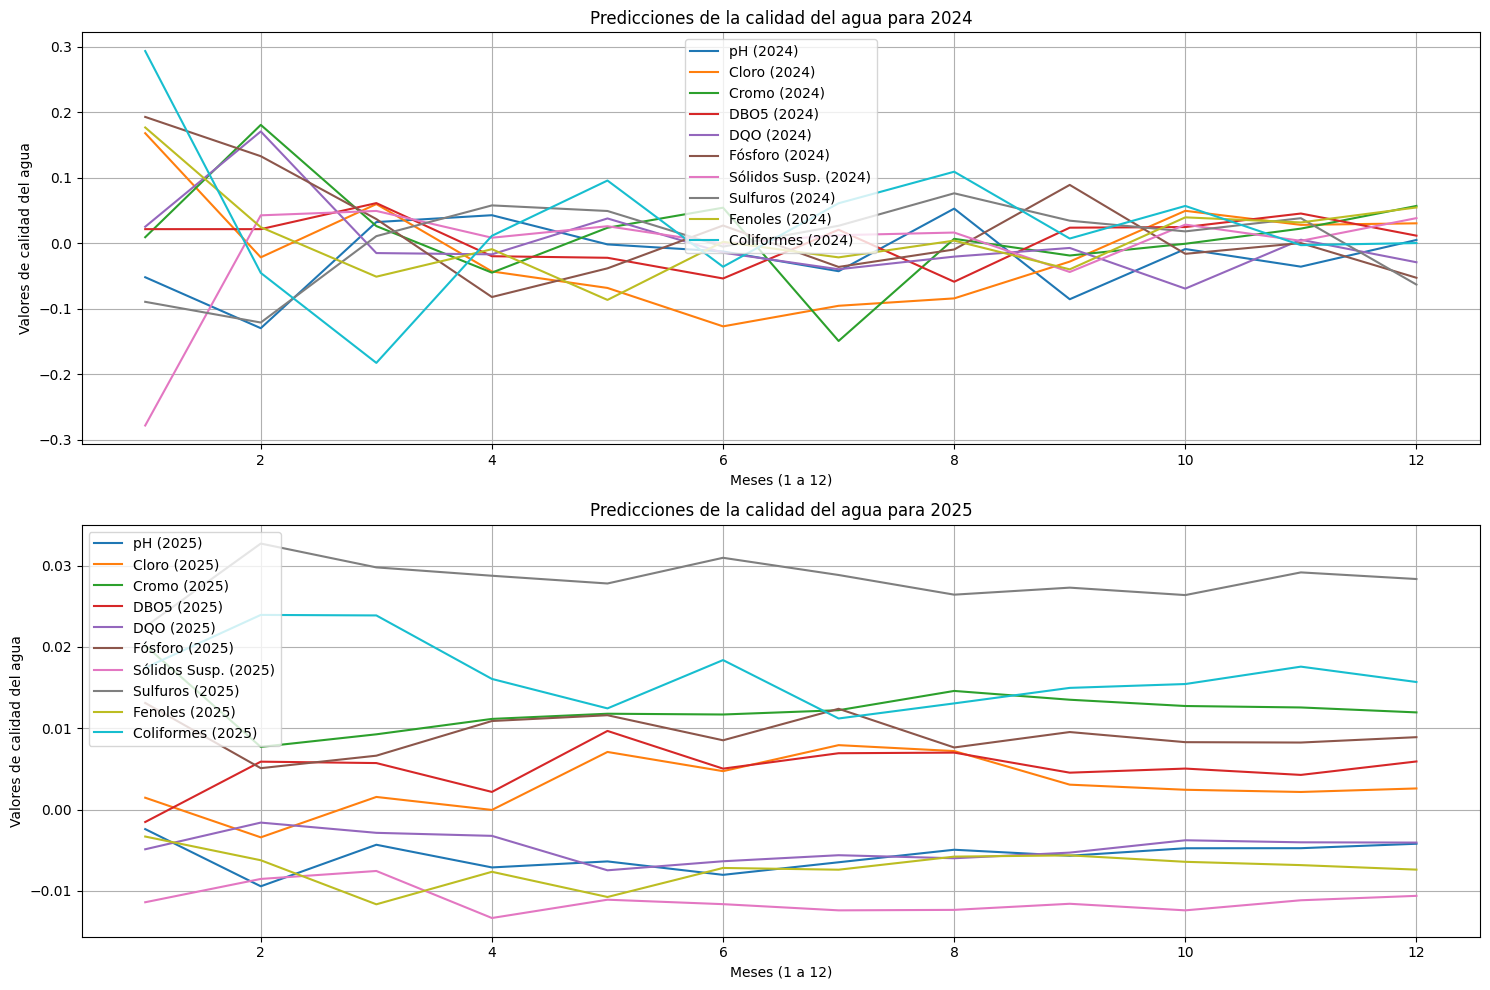

In [25]:

# Predecir los meses de 2024 y 2025
initial_input = X_test[-1]  # Ejemplo de datos de entrada para 2023
predicciones_futuras = predict_future(rnn, initial_input, months_to_predict=24)

# Dividir las predicciones por año
predicciones_2024, predicciones_2025 = dividir_predicciones_por_ano(predicciones_futuras, meses_por_ano=12)

# Graficar las predicciones por separado
graficar_predicciones_anuales(predicciones_2024, predicciones_2025, feature_names=feature_names)

In [26]:
print(predicciones_2024)
print(predicciones_2025)

[[-5.1643498e-02  1.6814251e-01  9.4336467e-03  2.1738468e-02
   2.5414886e-02  1.9298978e-01 -2.7789286e-01 -8.9168325e-02
   1.7688575e-01  2.9350242e-01]
 [-1.2940155e-01 -2.1273656e-02  1.8084979e-01  2.1748522e-02
   1.7080270e-01  1.3304809e-01  4.2822883e-02 -1.2075867e-01
   2.4718093e-02 -4.5031752e-02]
 [ 3.2542974e-02  5.9989195e-02  2.6401266e-02  6.1485097e-02
  -1.4768375e-02  3.7105873e-02  4.9520291e-02  1.1053388e-02
  -5.0794214e-02 -1.8235506e-01]
 [ 4.2998202e-02 -4.2799797e-02 -4.4620708e-02 -1.9576816e-02
  -1.6686240e-02 -8.1853628e-02  8.6496249e-03  5.7977807e-02
  -8.8515375e-03  1.1574145e-02]
 [-1.5438269e-03 -6.7989357e-02  2.3859492e-02 -2.1959553e-02
   3.8059805e-02 -3.8055785e-02  2.6193306e-02  4.9447022e-02
  -8.6256340e-02  9.5916450e-02]
 [-1.2314118e-02 -1.2660560e-01  5.4468986e-02 -5.3536952e-02
  -1.4183969e-02  2.7274009e-02 -2.6669394e-04 -4.9165534e-03
   2.4080116e-03 -3.5656538e-02]
 [-4.2447645e-02 -9.5217310e-02 -1.4890994e-01  2.0851860e

##=====================================================================================

#**RNN con Long Short-Term Memmory (LSTM)**

##1: Definir el modelo LSTM

In [28]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=10, hidden_size=100, output_size=10, num_layers=3, dropout=0.3):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM layers
        lstm_out, (h_n, c_n) = self.lstm(x)
        # Fully connected layer (output layer)
        out = self.fc(lstm_out[:, -1, :])  # Solo tomamos la última salida en el tiempo
        return out


##2: Entrenar el modelo LSTM

In [29]:
def fit(model, dataloader, epochs=10, weight_decay=1e-5):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=weight_decay)
    criterion = torch.nn.MSELoss()

    # tqdm para visualizar el progreso
    bar = tqdm(range(1, epochs+1))

    for epoch in bar:
        model.train()
        train_loss = []
        train_loss_last_step = []

        for batch in dataloader['train']:
            X, y = batch
            X, y = X.to(device), y.to(device)

            # Limpiar gradientes
            optimizer.zero_grad()

            # Hacer predicciones
            y_hat = model(X)

            # Calcular pérdida
            loss = criterion(y_hat, y)
            loss.backward()

            # Actualizar pesos
            optimizer.step()

            train_loss.append(loss.item())
            # Pérdida en el último paso temporal (para el último mes)
            train_loss_last_step.append((y[:, -1] - y_hat[:, -1]).pow(2).mean().item())

        # Evaluar en el conjunto de validación
        model.eval()
        eval_loss = []
        eval_loss_last_step = []
        with torch.no_grad():
            for batch in dataloader['eval']:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)

                # Calcular pérdida en validación
                loss = criterion(y_hat, y)
                eval_loss.append(loss.item())
                eval_loss_last_step.append((y[:, -1] - y_hat[:, -1]).pow(2).mean().item())

        bar.set_description(f"Epoch {epoch}, loss {np.mean(train_loss):.5f}, val_loss {np.mean(eval_loss):.5f}, loss_last_step {np.mean(train_loss_last_step):.5f}, val_loss_last_step {np.mean(eval_loss_last_step):.5f}")


In [30]:
# Instanciamos el modelo
lstm_model = LSTMModel()

# Entrenamiento del modelo
fit(lstm_model, dataloader, epochs=100)

Epoch 100, loss 0.99637, val_loss 1.00182, loss_last_step 0.99746, val_loss_last_step 1.00765: 100%|██████████| 100/100 [44:32<00:00, 26.72s/it]


##3: Hacer predicciones en el conjunto de prueba

In [31]:
def predict_lstm(model, dataloader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for inputs in dataloader: # Removed the , _
            outputs = model(inputs)
            predictions.append(outputs.cpu().numpy())
    return np.vstack(predictions)

# Obtener predicciones
y_pred_lstm = predict_lstm(lstm_model, dataloader['test'])
print(y_pred_lstm.shape)
print(y_pred_lstm)

(10000, 10)
[[ 0.14712738  0.0080167   0.03125115 ... -0.03883947  0.10875057
   0.06017685]
 [ 0.09612167  0.00974106  0.03032608 ... -0.05092487  0.08399022
   0.02836803]
 [-0.0875212  -0.07306278 -0.040623   ...  0.03901295 -0.12880461
  -0.07626231]
 ...
 [-0.07356697 -0.05657122 -0.03307225 ...  0.02895664 -0.12426234
  -0.06509731]
 [-0.07463524 -0.00345795 -0.02590835 ...  0.02236661 -0.05114207
  -0.03410392]
 [ 0.11230344  0.04621376  0.04236824 ... -0.06186589  0.1417951
   0.05642857]]


##4: Visualización de las predicciones

Ahora, graficamos las predicciones y comparamos con los valores reales:

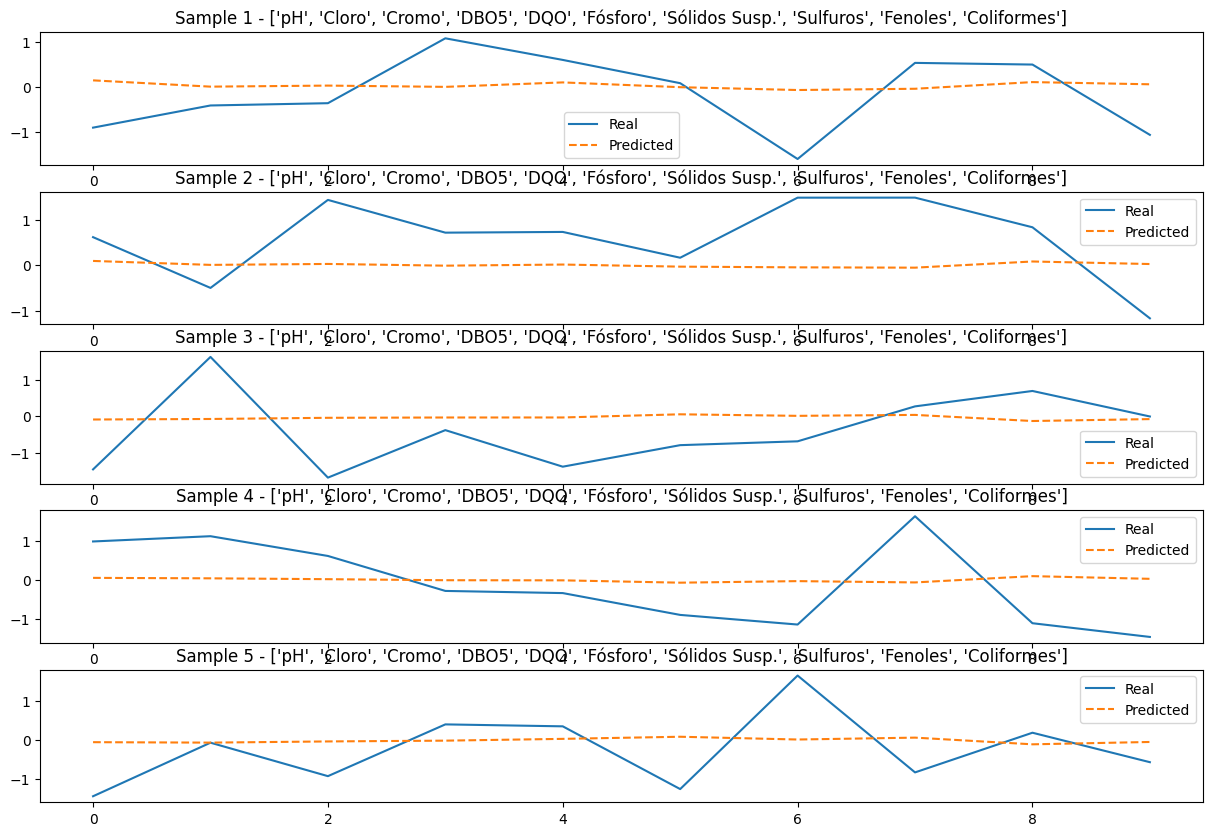

In [32]:
import matplotlib.pyplot as plt

def plot_lstm_predictions(X_test, Y_test, y_pred, feature_names=None, n_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(n_samples):
        plt.subplot(n_samples, 1, i + 1)
        plt.plot(Y_test[i], label="Real")
        plt.plot(y_pred[i], label="Predicted", linestyle='--')
        plt.title(f"Sample {i+1} - {feature_names}")
        plt.legend()
    plt.show()

# Graficar las primeras 5 predicciones
plot_lstm_predictions(X_test_, y_test_, y_pred_lstm, feature_names)


In [33]:
y_pred_lstm.shape

(10000, 10)

In [34]:
# Calcular el error cuadrático medio (MSE) para cada característica en todas las predicciones:
from sklearn.metrics import mean_squared_error

# Calcular el MSE para cada característica en todas las predicciones
mse = mean_squared_error(y_test_, y_pred_lstm)

# Mostrar el resultado
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1.0018408298492432


##5: Predecir la calidad del agua para 2024 y 2025

Para predecir los valores para los años 2024 y 2025, podemos seguir el mismo proceso pero ahora utilizando los datos de 2023 como punto de partida para generar secuencias futuras:

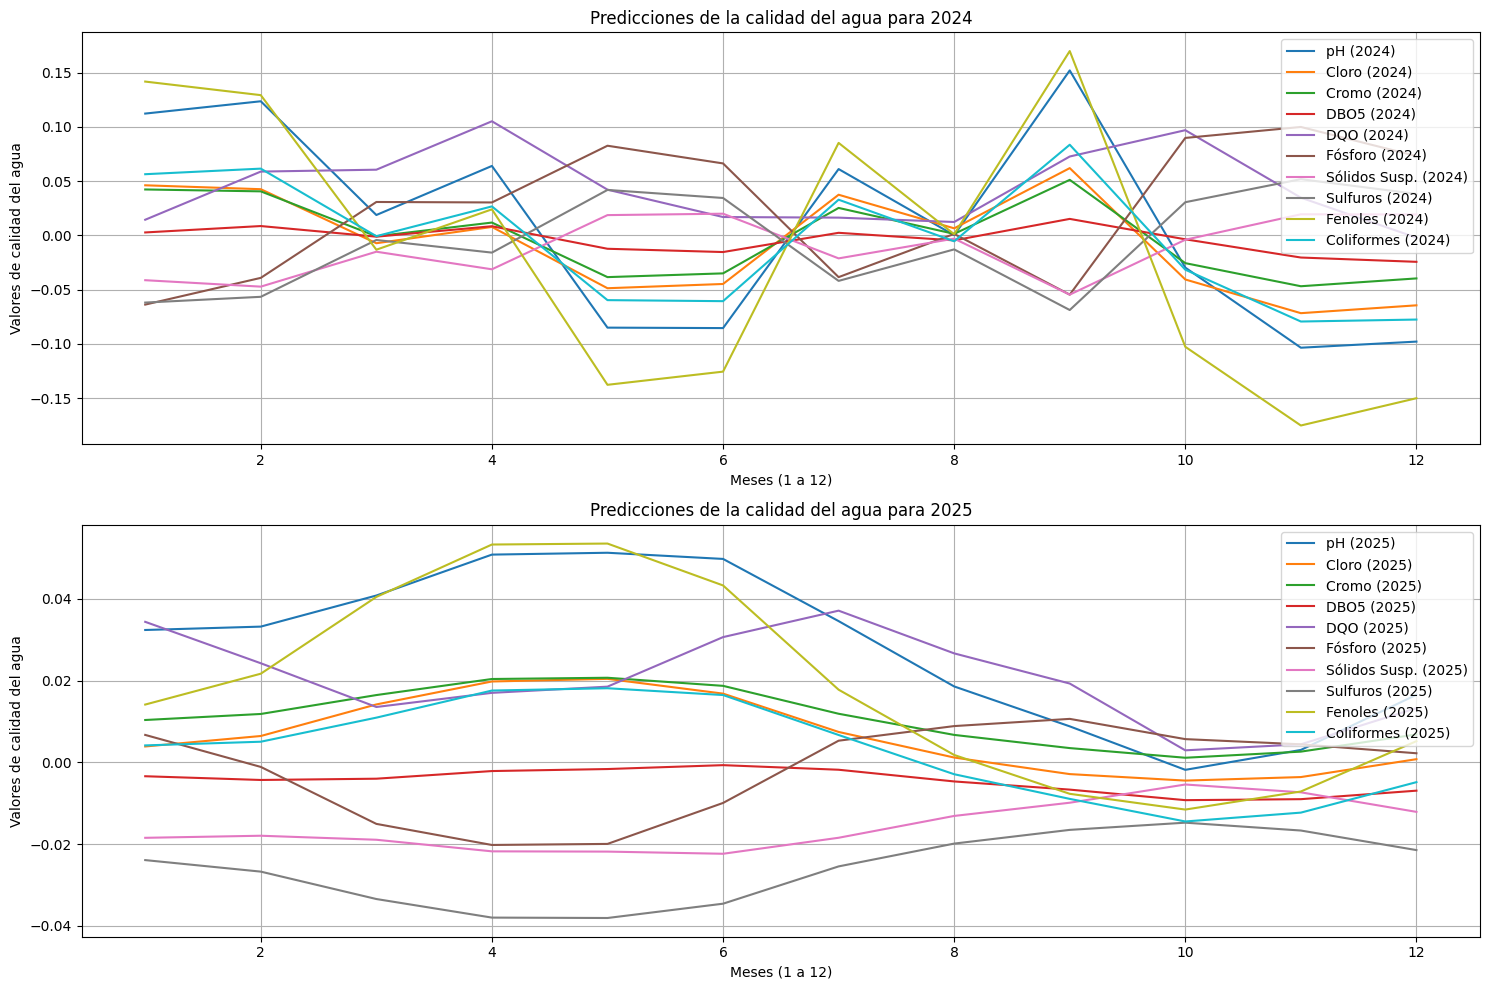

In [35]:
# Predecir los meses de 2024 y 2025
initial_input = X_test_[-1]  # Ejemplo de datos de entrada para 2023
predicciones_futuras = predict_future(lstm_model, initial_input, months_to_predict=24)

# Dividir las predicciones por año
predicciones_2024, predicciones_2025 = dividir_predicciones_por_ano(predicciones_futuras, meses_por_ano=12)

# Graficar las predicciones por separado
graficar_predicciones_anuales(predicciones_2024, predicciones_2025, feature_names=feature_names)

In [36]:
print(predicciones_2024)
print(predicciones_2025)

[[ 0.11230344  0.04621375  0.04236824  0.00276305  0.01447482 -0.06372664
  -0.04124453 -0.06186588  0.1417951   0.05642857]
 [ 0.12364302  0.04261614  0.0406273   0.00865649  0.05885391 -0.03909596
  -0.04717543 -0.0565521   0.12929349  0.06157048]
 [ 0.01883486 -0.00717854 -0.00075555 -0.00112808  0.0605871   0.03083881
  -0.01499346 -0.00419    -0.01313721 -0.00067009]
 [ 0.06404971  0.00782848  0.01187126  0.00848957  0.10520974  0.03041121
  -0.03119954 -0.01581663  0.02404771  0.02676761]
 [-0.08495878 -0.04863617 -0.03840239 -0.01227826  0.04218578  0.08267446
   0.01873929  0.04194271 -0.13764289 -0.05961259]
 [-0.08537153 -0.04472635 -0.03495088 -0.01529818  0.01697906  0.06637269
   0.02003986  0.03452696 -0.12549898 -0.06056146]
 [ 0.06117447  0.03751585  0.02535925  0.0024315   0.01640657 -0.03842022
  -0.0211319  -0.04187675  0.08529509  0.03293831]
 [ 0.00022433  0.00656641  0.0014552  -0.00453534  0.01239626  0.0014184
  -0.00294392 -0.01285719  0.00112735 -0.00536758]
 

##=================================================================================

#**Modelo RNN con GRU**

##1. Definición del Modelo GRU

In [41]:
import torch
import torch.nn as nn

class DeepGRU(nn.Module):
    def __init__(self, input_size=10, hidden_size=100, num_layers=3, n_out=10, dropout=0.3):
        super(DeepGRU, self).__init__()
        # Definir la capa GRU
        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout)
        # Capa fully connected
        self.fc = nn.Linear(hidden_size, n_out)

    def forward(self, x):
        # Paso a través de la GRU
        x, h = self.gru(x)  # x tiene forma [batch_size, time_steps, hidden_size]

        # Usamos solo la salida del último paso temporal
        x_reshaped = x[:, -1, :]  # Obtener el último paso temporal

        # Paso a través de la capa fully connected
        y = self.fc(x_reshaped)
        return y


##2. Función de Entrenamiento

In [39]:
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# Función de entrenamiento
def fit(model, dataloader, epochs=10, weight_decay=1e-5):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=weight_decay)
    criterion = torch.nn.MSELoss()

    # tqdm para visualizar el progreso
    bar = tqdm(range(1, epochs+1))

    for epoch in bar:
        model.train()
        train_loss = []
        train_loss_last_step = []

        for batch in dataloader['train']:
            X, y = batch
            X, y = X.to(device), y.to(device)

            # Limpiar gradientes
            optimizer.zero_grad()

            # Hacer predicciones
            y_hat = model(X)

            # Calcular la pérdida
            loss = criterion(y_hat, y)
            loss.backward()

            # Actualizar los pesos
            optimizer.step()

            train_loss.append(loss.item())
            train_loss_last_step.append((y[:, -1] - y_hat[:, -1]).pow(2).mean().item())

        # Evaluación en el conjunto de validación
        model.eval()
        eval_loss = []
        eval_loss_last_step = []
        with torch.no_grad():
            for batch in dataloader['eval']:
                X, y = batch
                X, y = X.to(device), y.to(device)

                # Predicción en validación
                y_hat = model(X)
                loss = criterion(y_hat, y)
                eval_loss.append(loss.item())
                eval_loss_last_step.append((y[:, -1] - y_hat[:, -1]).pow(2).mean().item())

        # Mostrar el progreso con tqdm
        bar.set_description(f"Epoch {epoch}, loss {np.mean(train_loss):.5f}, val_loss {np.mean(eval_loss):.5f}, loss_last_step {np.mean(train_loss_last_step):.5f}, val_loss_last_step {np.mean(eval_loss_last_step):.5f}")


##3. Función de Predicción

In [40]:
# Función para predecir
def predict(model, dataloader):
    model.eval()
    preds = []
    with torch.no_grad():
        for batch in dataloader['test']:
            X = batch
            X = X.to(device)
            pred = model(X)
            preds.append(pred.cpu().numpy())
    return np.concatenate(preds)


##4. Entrenar el Modelo GRU

Ahora puedes entrenar tu modelo DeepGRU de la misma manera que entrenaste los modelos anteriores.

In [43]:
# Instanciar el modelo GRU
model_GRU = DeepGRU()

# Entrenar el modelo GRU
fit(model_GRU, dataloader, epochs=100)


Epoch 100, loss 0.99748, val_loss 0.99994, loss_last_step 0.99680, val_loss_last_step 1.00742: 100%|██████████| 100/100 [40:49<00:00, 24.50s/it]


In [45]:
# Realizar predicciones con el modelo GRU
y_pred_GRU = predict(model_GRU, dataloader)
print(y_pred_GRU.shape)
print(y_pred_GRU)

(10000, 10)
[[ 0.00634466 -0.01057657 -0.12255179 ... -0.01922558 -0.01078167
  -0.06291497]
 [ 0.03171051 -0.03320938 -0.03127735 ... -0.06300481 -0.03023045
  -0.05954473]
 [-0.11678744 -0.05656403 -0.06051374 ...  0.01210266  0.04436541
   0.00390252]
 ...
 [-0.02928753 -0.02041023  0.04127385 ... -0.00578148  0.04424375
  -0.00377097]
 [ 0.02091212  0.08057427 -0.07616382 ... -0.04378204  0.0431858
  -0.08517502]
 [ 0.00727354 -0.01313079  0.01317613 ...  0.08934744 -0.0203764
   0.05771214]]


####Visualización de las predicciones

Ahora, graficamos las predicciones y comparamos con los valores reales:

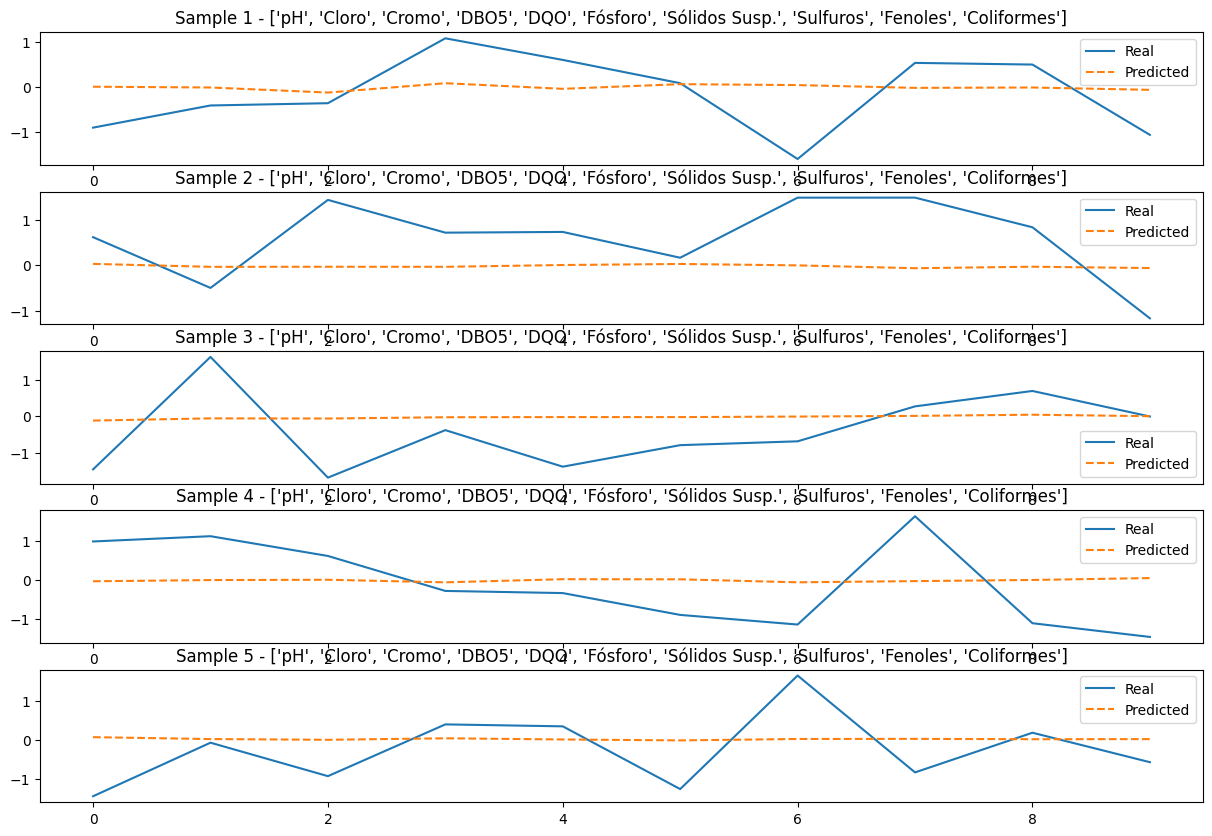

In [46]:
import matplotlib.pyplot as plt

def plot_gru_predictions(X_test, Y_test, y_pred, feature_names=None, n_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(n_samples):
        plt.subplot(n_samples, 1, i + 1)
        plt.plot(Y_test[i], label="Real")
        plt.plot(y_pred[i], label="Predicted", linestyle='--')
        plt.title(f"Sample {i+1} - {feature_names}")
        plt.legend()
    plt.show()

# Graficar las primeras 5 predicciones
plot_lstm_predictions(X_test_, y_test_, y_pred_GRU, feature_names)


In [47]:
# Calcular el error cuadrático medio (MSE) para cada característica en todas las predicciones:
from sklearn.metrics import mean_squared_error

# Calcular el MSE para cada característica en todas las predicciones
mse = mean_squared_error(y_test_, y_pred_GRU)

# Mostrar el resultado
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.9998053312301636


##Predecir la calidad del agua para 2024 y 2025

Para predecir los valores para los años 2024 y 2025, podemos seguir el mismo proceso pero ahora utilizando los datos de 2023 como punto de partida para generar secuencias futuras:

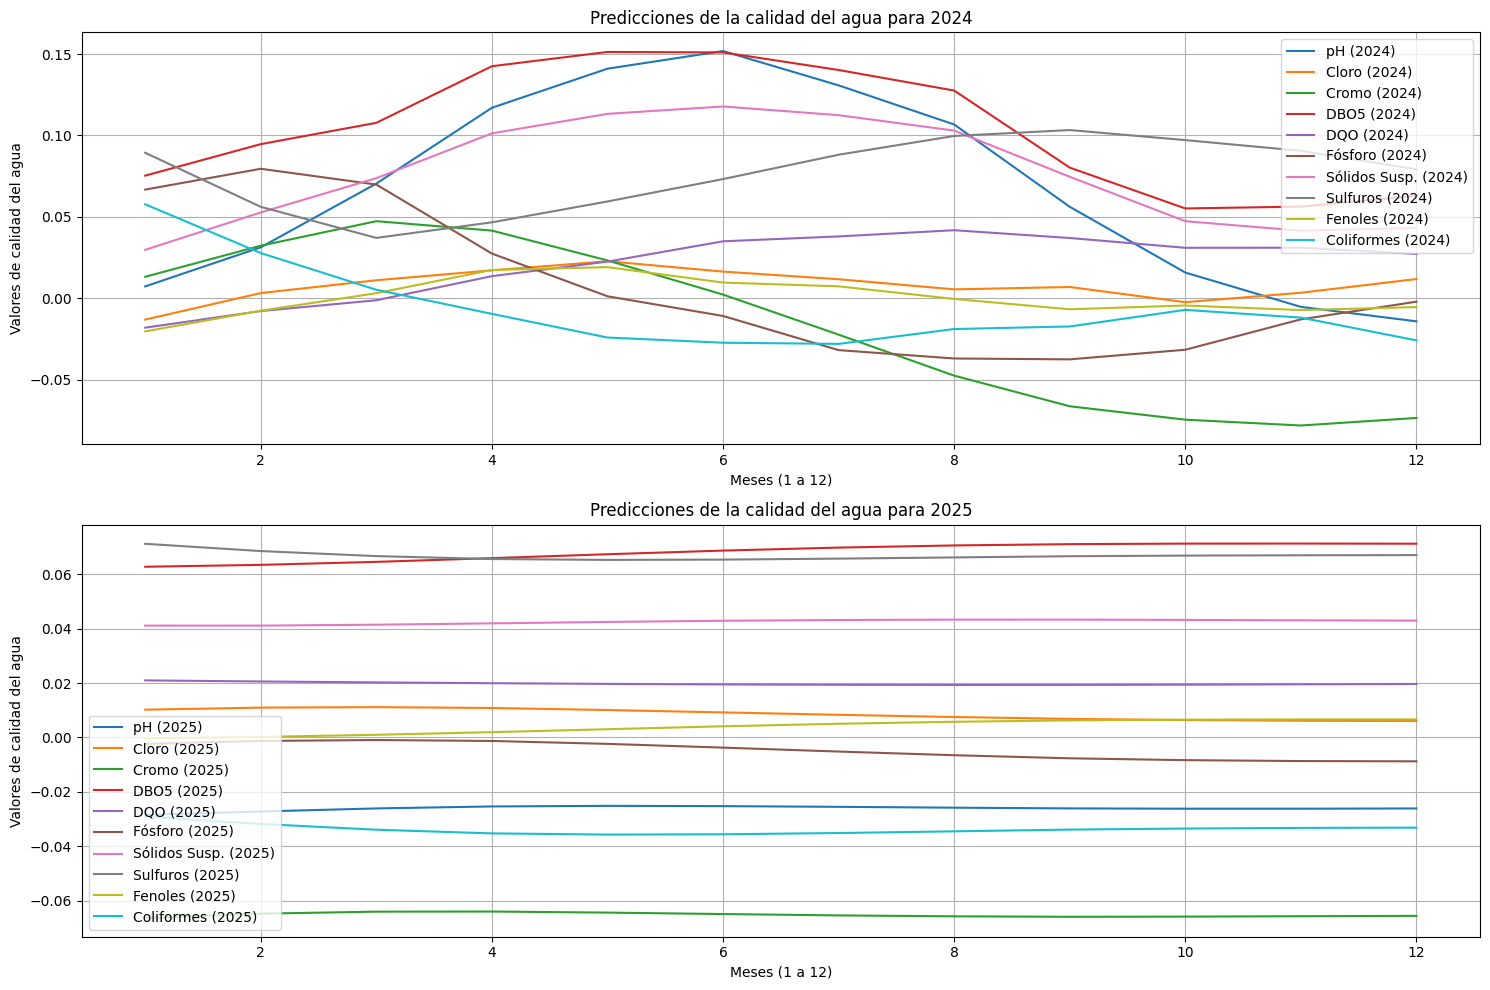

In [50]:
# Predecir los meses de 2024 y 2025
initial_input = X_test_[-1]  # Ejemplo de datos de entrada para 2023
predicciones_futuras = predict_future(model_GRU, initial_input, months_to_predict=24)

# Dividir las predicciones por año
predicciones_2024, predicciones_2025 = dividir_predicciones_por_ano(predicciones_futuras, meses_por_ano=12)

# Graficar las predicciones por separado
graficar_predicciones_anuales(predicciones_2024, predicciones_2025, feature_names=feature_names)

In [51]:
print(predicciones_2024)
print(predicciones_2025)

[[ 0.00727354 -0.01313078  0.01317611  0.07530716 -0.01809286  0.06672812
   0.02972543  0.08934742 -0.02037639  0.05771213]
 [ 0.03128964  0.00317438  0.03227707  0.09466214 -0.00788961  0.0795273
   0.05272599  0.0561395  -0.00766909  0.02774324]
 [ 0.07044144  0.01104411  0.04733562  0.10775901 -0.00124121  0.06983275
   0.07376157  0.03706525  0.00309361  0.00520638]
 [ 0.11700331  0.01713157  0.04154256  0.14252722  0.01355884  0.02743276
   0.10129318  0.04661939  0.01737649 -0.00959289]
 [ 0.14100862  0.02271764  0.02322097  0.15128666  0.02249551  0.00120611
   0.1132571   0.05944065  0.01909959 -0.02413866]
 [ 0.15184289  0.01636964  0.00224624  0.15100333  0.03497018 -0.01089631
   0.11780019  0.0731996   0.00962286 -0.02733725]
 [ 0.13076329  0.01167911 -0.02236555  0.14020988  0.0379661  -0.03187183
   0.11244667  0.08815815  0.0073025  -0.02804201]
 [ 0.10673494  0.00545027 -0.0475425   0.12757997  0.04178043 -0.03701733
   0.10298592  0.09968315 -0.0004355  -0.01891733]
 

##Conclusión

Como resultados de entrenamientoo y pruebas con los modoles implementados podemso decir que el modelo RNN  GRU fue la mejor porque los resultados en serie de tiempo los resultados fueron mas precisos en las predicciones y ademas para las predicciones de los años 2014 y 2025 las predicciones estan casi a la misma escala que los datos anteriores de la gestios de 2023 durante los 12 meses.